In [29]:
#libraries
import numpy as np
import matplotlib.pyplot as plt
import math 

In [30]:
#input variables
N = int(input("Numero de usuarios: "))
proConnect =  float(input("Probabilidad que se conecte un usuario: "))
proDisconnect =  float(input("Probabilidad que se desconecte un usuario: "))

In [31]:
#variables
P = np.zeros((N+1,N+1)) #matriz de probabilidad

In [32]:
#functions
def combinatoria(n,x):
    if x > n or x < 0:
        return 0
    else:
        c = math.factorial(n)/ (math.factorial(x) * math.factorial(n-x ))
        return c

def binomial(n,x,p):
    return combinatoria(n,x) *  (p ** x) * ((1 - p)**(n - x))

# DATOS
- i: hace referencia a la cantidad de usuarios conectados en ese momento
- conn hace referencia al numero de usuarios que se pueden conectar
- nconn: numero de usuarios disponibles para conectar
- xconn: usuarios a conectar
- disc hace referencia al numero de usuarios que se pueden desconectar
- ndisc: numero de usuarios disponibles para desconectar
- xdisc: usuarios a desconectar
- n numero de usuarios que usan el ordenador

In [33]:
#code
for i in range(N+1):
    for j in range(N+1):
        #si no hay ningun usuario conectado, probabilidad que se conecten usuarios
        if i == 0:
            conn = j
            P[i][j] = binomial(N, conn, proConnect)

        #si todos los usuarios estan conectados probabilidad de desconectar usuarios
        elif i == N: 
            disc = i - j 
            P[i][j] = binomial(N, disc, proDisconnect)
        
        #si el usuario actual se desconecta entra Y uno nuevo o no hay ningun cambio
        elif i <= j:
            nconn = N - i
            ndisc = i
            xconn = j - i
            xdisc = 0
            probabilidad = 0
            
            while xconn <= nconn and xdisc <= ndisc:
                probabilidad += (binomial(nconn, xconn, proConnect)) * (binomial(ndisc, xdisc, proDisconnect))
                xconn += 1
                xdisc += 1
            
            P[i][j] = probabilidad
        
        #conectan y desconectan usuarios
        else:
            nconn = N - i
            ndisc = i
            xdisc = i - j
            xconn = 0
            probabilidad = 0

            while xconn <= nconn and xdisc <= ndisc:
                probabilidad += (binomial(nconn, xconn, proConnect)) * (binomial(ndisc, xdisc, proDisconnect))
                xconn += 1
                xdisc += 1
            
            P[i][j] = probabilidad


 Numero Usuarios:  10 
 Probabilidad de conexion:  0.4 
 Probabilidad de desconexion:  0.3


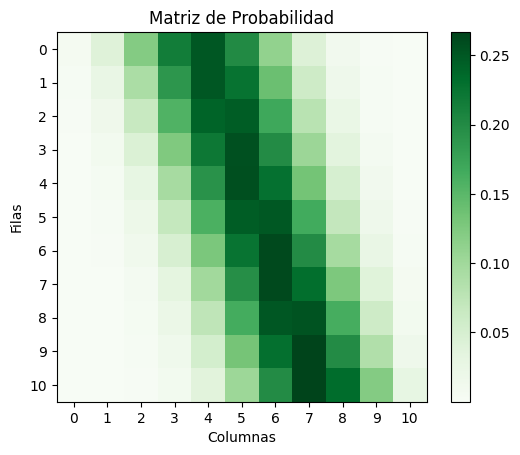

Verificacion Sumatoria Filas

fila 0:  1.0
fila 1:  1.0
fila 2:  1.0
fila 3:  0.9999999999999999
fila 4:  1.0000000000000002
fila 5:  0.9999999999999998
fila 6:  0.9999999999999997
fila 7:  0.9999999999999998
fila 8:  0.9999999999999996
fila 9:  0.9999999999999994
fila 10:  0.9999999999999994

 Matriz de Probabilidad 

 [[6.04661760e-03 4.03107840e-02 1.20932352e-01 2.14990848e-01
  2.50822656e-01 2.00658125e-01 1.11476736e-01 4.24673280e-02
  1.06168320e-02 1.57286400e-03 1.04857600e-04]
 [3.02330880e-03 2.51942400e-02 9.06992640e-02 1.88116992e-01
  2.50822656e-01 2.25740390e-01 1.39345920e-01 5.83925760e-02
  1.59252480e-02 2.55590400e-03 1.83500800e-04]
 [1.51165440e-03 1.51165440e-02 6.46652160e-02 1.56764160e-01
  2.40371712e-01 2.45248819e-01 1.69537536e-01 7.87415040e-02
  2.35929600e-02 4.12876800e-03 3.21126400e-04]
 [7.55827200e-04 8.81798400e-03 4.40899200e-02 1.24431552e-01
  2.20123008e-01 2.56309402e-01 2.00019456e-01 1.03818240e-01
  3.44494080e-02 6.62323200e-03 5.6197

In [34]:
#info
print(" Numero Usuarios: ", N, "\n",
    "Probabilidad de conexion: ", proConnect, "\n",  
    "Probabilidad de desconexion: ", proDisconnect)



#graphics
x , y = P.shape

plt.imshow(P, cmap='Greens')    
plt.colorbar()
plt.xlabel('Columnas')
plt.xticks(range(x))
plt.ylabel('Filas')
plt.yticks(range(y))
plt.title("Matriz de Probabilidad")
plt.show()

#show sum in row
print("Verificacion Sumatoria Filas\n")
for i in range(N+1):
    suma = np.sum(P[i])
    print(f'fila {i}: ', suma)
    i += 1

#show matrix
print("\n Matriz de Probabilidad \n\n", P)